**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (10 points) 

Rewrite the following code into functional form using lambdas, map, filter and reduce.

In [1]:
n = 10
s = 10
for i in range(n):
    if i % 2:
        s |= i**2
s

123

In [2]:
from functools import reduce
n = s = 10
reduce(lambda x,y: x|y, map(lambda x: x**2, filter(lambda x: x%2, range(n))), s)

123

**2**. (10 points)

Rewrite the code above as a `toolz` pipeline, using lambdas and curried or partially applied functions as necessary.

In [3]:
import toolz as tz
import toolz.curried as c
from functools import partial
tz.pipe(
    range(s),
    c.filter(lambda x: x%2),
    c.map(lambda x: x**2),
    c.reduce(lambda x,y: x|y),
    partial(lambda x,y: x|y, s)
)

123

**3**. (10 points) 

Repeat the Buffon's needle simulation from Lab01 as a function that takes the number of needels `n` as input and returns the estimate of $\pi$. The function should use `numpy` and vectorization.  What is $\pi$ for 1 million needles?

In [4]:
import numpy as np
def Buffon_Pi(n):
    D,L = 1,0.8
    theta = np.random.uniform(0, 0.5*np.pi, n)
    x = np.random.uniform(0, 0.5*D, n)
    count = np.sum(0.5*L*np.cos(theta)>x)
    pi = 2*L*n/(count*D)
    return pi
Buffon_Pi(int(1e6))

3.1381163456635153

**4**. (20 points) 

Simpsons rule is given by the follwoing approximation

![Simpsons](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0cdf0804bb8810e4438cbea898dc7a2fedb3e57)

- Write Simpsons rule as a function `simpsons(f, a, b, n=100)` where n is the number of equally spaced intervals from `a` to `b`.  (10 points)
- Use this function to estimate the probability mass of the standard normal distribution between -1 and 1. Implement the PDF of the standard normal distribution $\psi(x)$ as a function. (10 points)

$$
\psi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

In [5]:
def simpsons(f, a, b, n=100):
    h = (b-a)/n
    x = f(np.linspace(a,b,n+1))
    y = np.array([1]+[4 if i%2 else 2 for i in range(1,n)]+[1])
    return np.dot(x,y)*h/3

def std_norm(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

simpsons(std_norm, -1, 1)

0.68268949299754922

**5**. (50 points)

Write code to generate a plot similar to the following 

![automata](./automata1d.png)

using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

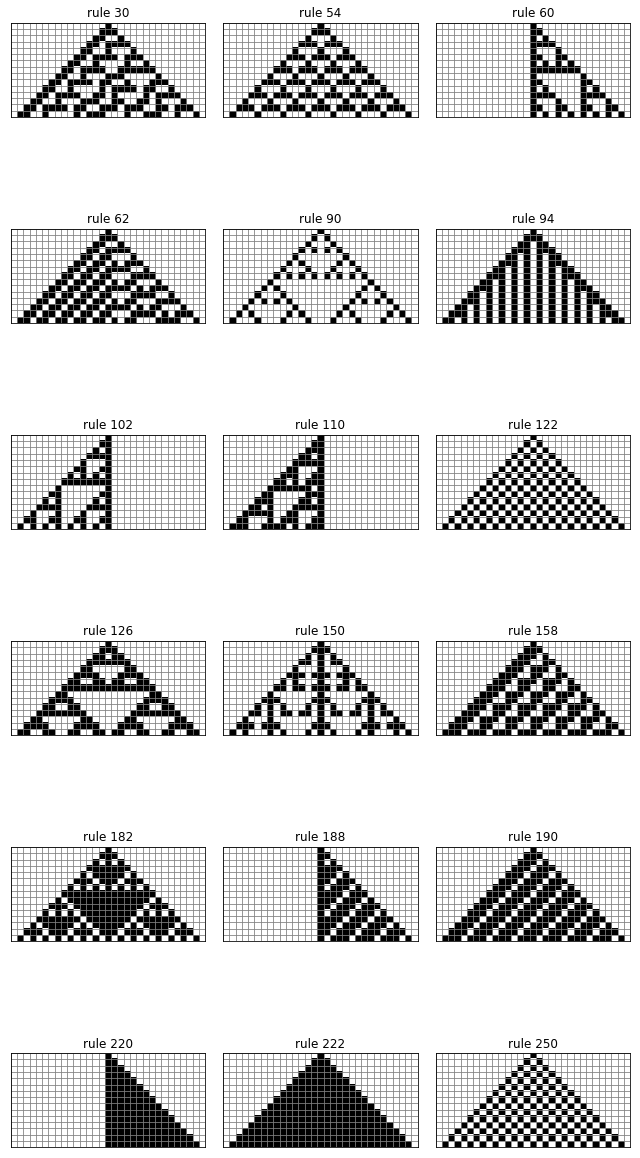

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# niter,ncols = 15,31
def construct_table(rule):
    code = format(rule, '08b')
    return {format(n,'03b'):int(char) for n,char in enumerate(code[::-1])}

def mat_gen(rule, niter, ncols):
    rows = [np.zeros(ncols, dtype='int32')]
    rows[0][ncols//2] = 1
    table = construct_table(rule)
    for i in range(niter-1):
        tmp = np.zeros(ncols, dtype='int32')
        for j in range(1, ncols-1):
            key_str = ''.join([str(n) for n in rows[-1][j-1:j+2]])
            tmp[j] = table[key_str]
        rows.append(tmp)
    return np.vstack(rows)

def make_plots(rules, niter, ncols):
    fig,axes = plt.subplots(6, 3, figsize=(9,18))
    plt.setp(axes, xticks=np.arange(-0.5,ncols,1), xticklabels=[],
        yticks=np.arange(-0.5,niter,1), yticklabels=[])
    for i,ax in enumerate(axes.ravel()):
        ax.imshow(mat_gen(rules[i], niter, ncols), cmap='gray_r')
        ax.set_title('rule %d' % rules[i])
        ax.grid(color='gray')
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
    plt.tight_layout()
    
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, 15, 31)
